In [315]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

# Importing Train Data Set

In [316]:
df_train=pd.read_excel("C:\\Users\\Acer Aspire 3\\Desktop\Data_Train.xlsx")
df_train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


This dataset contain both numeric and categorical data. Here Price is our Target variable and is is continueos. Hence, Regression type probles

In [317]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


# Exploratory Data Analysis(EDA)

In [318]:
#checking the dimension of data
df_train.shape

(10683, 11)

This dataset contain 10683 rows and 11 columns

In [319]:
#to get good overview of dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


This gives the infornation about the dataset which incluses indexing, columns, non-null count and memory usage

In [320]:
#checking the type of dataset
df_train.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

The columns in dataset contain two types of data, object and integer datatypes

# Feature Engineering

converting data and time columns from object type to datetime type

In [321]:
df_train['Date_of_Journey']=pd.to_datetime(df_train['Date_of_Journey'])
df_train['Dep_Time']=pd.to_datetime(df_train['Dep_Time'])
df_train['Arrival_Time']=pd.to_datetime(df_train['Arrival_Time'])

In [322]:
#after converting checking the datatypes

df_train.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

We have converted object datatype to datetime datatype

In [323]:
#Extracting day from Date_of_Journey column
df_train["Journey_Day"]=pd.to_datetime(df_train.Date_of_Journey, format="%d%m%Y").dt.day

#Extracting month from Date_of_Journey column
df_train["Journey_Month"]=pd.to_datetime(df_train.Date_of_Journey, format="%d%m%Y").dt.month

Now we have converted Date_of_Journey column into integer data type. we cn drop this column as it is of no use

In [324]:
#dropping Date_of_Journey column
df_train.drop("Date_of_Journey", axis=1, inplace=True)

In [325]:
#converting duration column into list
duration=list(df_train["Duration"])

for i in range(len(duration)):
    
    #checking if duration contain only hour or minute
    if len(duration[i].split()) != 2:
        if 'h' in duration[i]:
            duration[i]=duration[i].strip()+' 0m'
        else:
            duration[i]="0h "+duration[i]
duration_hours=[]
duration_mins=[]

for i in range(len(duration)):
    
    #extracting hours from Duration
    duration_hours.append(int(duration[i].split(sep='h')[0]))
    
    #extracting mins from duration
    duration_mins.append(int(duration[i].split(sep='m')[0].split()[-1]))

In [328]:
#adding duration hours and duration mins to the data set

df_train["Duration_hours"]= duration_hours
df_train["Duration_mins"]= duration_mins

#dropping duration column
df_train.drop("Duration", axis=1, inplace=True)

In [329]:
#Extracting hour from Dep_Time column
df_train["Dep_Hours"]=pd.to_datetime(df_train.Dep_Time, format="%d%m%Y").dt.hour

#Extracting min from Dep_Time column
df_train["Dep_Min"]=pd.to_datetime(df_train.Dep_Time, format="%d%m%Y").dt.minute

Now we have extracted hours and minute from Dep_Time column. So we can drop this column 


In [330]:
df_train.drop(("Dep_Time"), axis=1, inplace=True)

In [331]:
#Extracting hour from Arrival_Time column
df_train["Arrival_Hours"]=pd.to_datetime(df_train["Arrival_Time"]).dt.hour

#Extracting min from Dep_Time column
df_train["Arrival_Min"]=pd.to_datetime(df_train["Arrival_Time"]).dt.minute

#dropping arriaal time after extracting
df_train.drop(("Arrival_Time"), axis=1, inplace=True)

Now we have extracted the values from all the columns. Let us check the dataframe after feature engineering

In [332]:
#checking the dataset again

df_train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hours,Dep_Min,Duration_hours,Duration_mins,Arrival_Hours,Arrival_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,2,50,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,7,25,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,19,0,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,5,25,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,4,45,21,35


In [333]:
df_train.shape

(10683, 15)

In [334]:
#checking the value counts of each columns
for i in df_train.columns:
    print(df_train[i].value_counts())
    print('**********************************')

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
**********************************
Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64
**********************************
Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64
**********************************
DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR            

These are the list of values present in the columns.

From the above value counts we can observe some repeated categories in some column. lets replace them.

In [335]:
#replacing "Jet Airways Business" as "Jet Airways" in the column Airline
df_train["Airline"]=df_train["Airline"].replace("Jet Airways Business", "Jet Airways")

#replacing "Multiple carriers premium economy" as "Multiple Carrirss" in the Airline column
df_train["Airline"]=df_train["Airline"].replace("Multiple carriers Premium economy", "Multiple carriers")

#replacing "vistara premium economy" as "Vistara" in the column Airline
df_train["Airline"]=df_train["Airline"].replace("Vistara Premium economy", "Vistara")

#replacing "New Delhi" as "Delhi" in the column Destination
df_train["Destination"]=df_train["Destination"].replace("New Delhi", "Delhi")

#replacing "no info", "no info" as "are one and the same replace it by "No Info"
df_train["Additional_Info"]=df_train["Additional_Info"].replace("No info", "No Info")

#replacing "1 long layover" and "2 long layover" as "long layover" in the column Additinal Info
df_train["Additional_Info"]=df_train["Additional_Info"].replace(["1 Long layover","2 Long layover"], "Long layover")  

In [336]:
val_count =["Airline", "Destination", "Additional_Info"]

for i in val_count:
    print(df_train[i].value_counts())
    print("******************************")

Jet Airways          3855
IndiGo               2053
Air India            1752
Multiple carriers    1209
SpiceJet              818
Vistara               482
Air Asia              319
GoAir                 194
Trujet                  1
Name: Airline, dtype: int64
******************************
Cochin       4537
Banglore     2871
Delhi        2197
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64
******************************
No Info                         8348
In-flight meal not included     1982
No check-in baggage included     320
Long layover                      20
Change airports                    7
Business class                     4
1 Short layover                    1
Red-eye flight                     1
Name: Additional_Info, dtype: int64
******************************


In [337]:
#checking number of unique values in each column
df_train.nunique()

Airline               9
Source                5
Destination           5
Route               128
Total_Stops           5
Additional_Info       8
Price              1870
Journey_Day           9
Journey_Month         7
Dep_Hours            24
Dep_Min              12
Duration_hours       44
Duration_mins        12
Arrival_Hours        24
Arrival_Min          12
dtype: int64

These are the number of unique values present in the dataset

In [338]:
#checking null values in dataset

df_train.isnull().sum()

Airline            0
Source             0
Destination        0
Route              1
Total_Stops        1
Additional_Info    0
Price              0
Journey_Day        0
Journey_Month      0
Dep_Hours          0
Dep_Min            0
Duration_hours     0
Duration_mins      0
Arrival_Hours      0
Arrival_Min        0
dtype: int64

Route  and Total_Stops have null values and these are categorical columns hence we can fill it my mode values

# Treating null values use imputation techniques

In [339]:
#let us check the mode of the categorical columns to fill the null values

print("The mode of Route is :", df_train["Route"].mode())
print("The mode of Total_Stops is :", df_train["Total_Stops"].mode())

The mode of Route is : 0    DEL → BOM → COK
dtype: object
The mode of Total_Stops is : 0    1 stop
dtype: object


In [340]:
#filling missing values of route by its mode DEL → BOM → COK
df_train["Route"]=df_train["Route"].fillna(df_train["Route"].mode()[0])

#filling missing values of Total_Stops by its mode 1 stop
df_train["Total_Stops"]=df_train["Total_Stops"].fillna(df_train["Total_Stops"].mode()[0])

We have filled the missing values with null values

In [341]:
#checking the missing values again

df_train.isnull().sum()

Airline            0
Source             0
Destination        0
Route              0
Total_Stops        0
Additional_Info    0
Price              0
Journey_Day        0
Journey_Month      0
Dep_Hours          0
Dep_Min            0
Duration_hours     0
Duration_mins      0
Arrival_Hours      0
Arrival_Min        0
dtype: int64

Hence there are no missing values in the dataset

<AxesSubplot:>

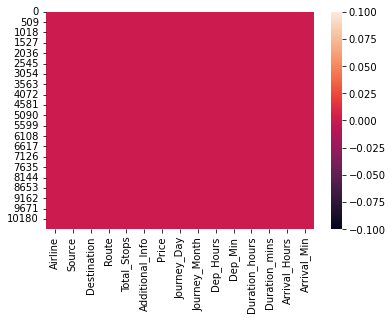

In [342]:
#Visualizing the null values

sns.heatmap(df_train.isnull())

So it is clear from the plot that there is no missing values

In [343]:
#checking how many columns are there in dataset
df_train.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_Day', 'Journey_Month', 'Dep_Hours',
       'Dep_Min', 'Duration_hours', 'Duration_mins', 'Arrival_Hours',
       'Arrival_Min'],
      dtype='object')

In [344]:
#checkig the uniqueness of the target column

df_train["Price"].unique()

array([ 3897,  7662, 13882, ...,  9790, 12352, 12648], dtype=int64)

These are the uniquq values present in the target column

In [345]:
#checking the list of counts in target column

df_train["Price"].value_counts()

10262    258
10844    212
7229     162
4804     160
4823     131
        ... 
14153      1
8488       1
7826       1
6315       1
12648      1
Name: Price, Length: 1870, dtype: int64

These are the value counts in the target column

In [346]:
#Checking if dataset contain any space
df_train.loc[df_train['Price']== " "]

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hours,Dep_Min,Duration_hours,Duration_mins,Arrival_Hours,Arrival_Min


There are no empty spaces in any of the columns

# Statistical summary of Dataset

In [347]:
df_train.describe()

,Price,Journey_Day,Journey_Month,Dep_Hours,Dep_Min,Duration_hours,Duration_mins,Arrival_Hours,Arrival_Min
count,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000
mean,9087.064121,12.682205,5.534775,12.490686,24.411214,10.246092,28.327717,13.348778,24.690630
std,4611.359167,8.803701,2.987489,5.748650,18.767980,8.495414,16.945400,6.859125,16.506036
min,1759.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5277.000000,5.000000,3.000000,8.000000,5.000000,2.000000,15.000000,8.000000,10.000000
50%,8372.000000,6.000000,5.000000,11.000000,25.000000,8.000000,30.000000,14.000000,25.000000
75%,12373.000000,21.000000,6.000000,18.000000,40.000000,15.000000,45.000000,19.000000,35.000000
max,79512.000000,27.000000,12.000000,23.000000,55.000000,47.000000,55.000000,23.000000,55.000000


This Gives the statistical information of the dataset

The count of every column is same which means there are no missing values in dataset

The mean is more than median in  the columns Price,Journey_Day, Duration_hours,Dep_Hours which means they are skewed to right

In some columns differece is more between max and 75%, hence outliers are present

The median is greaterthan mean in Dep_Min	Arrival_Hours	Arrival_Min which means that they are skewd towards left

From the description we can say that the minimum price of the flight ticket is 1759 maximum is 79512 and mean is 9087.06

We can also see that there is huge differnce in maximun and 75% which means that outliers are present in those columns

# checking for categorical columns

In [348]:
categorical_col=[]
for i in df_train.dtypes.index:
    if df_train.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']


These are the categorical columns present in the dataset

# Simlarly checking for numeric columns


In [349]:
numerical_col=[]
for i in df_train.dtypes.index:
    if df_train.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['Price', 'Journey_Day', 'Journey_Month', 'Dep_Hours', 'Dep_Min', 'Duration_hours', 'Duration_mins', 'Arrival_Hours', 'Arrival_Min']


These are the numeric columns present in the dataset

# Data Visualization

# Univariate Analysis: Plotting categirical columns

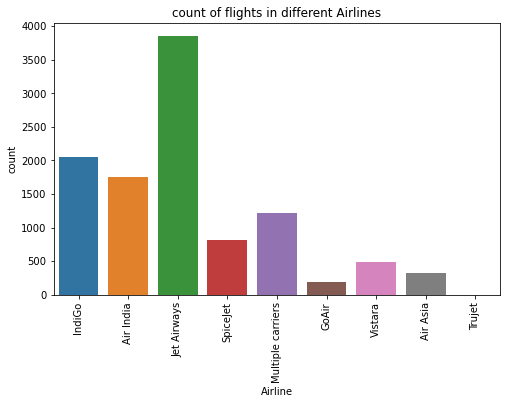

In [350]:
#count plot for Airline
plt.figure(figsize=(8,5))
sns.countplot(df_train['Airline'])
plt.title("count of flights in different Airlines")
plt.xticks(rotation=90)
plt.show()

The count of flights is high in Jet Airways and less in Trujet and GoAir

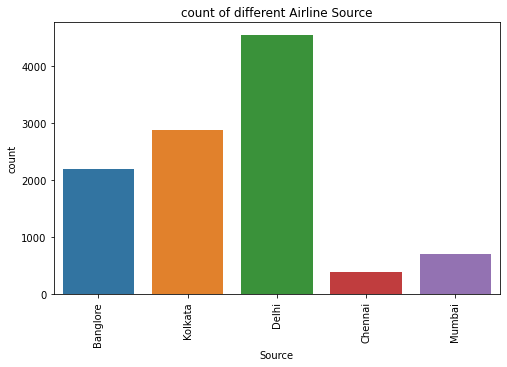

In [351]:
#count plot for Source
plt.figure(figsize=(8,5))
sns.countplot(df_train['Source'])
plt.title("count of different Airline Source")
plt.xticks(rotation=90)
plt.show()

The count of source is high in Delhi. most of the flights service begins in Delhi

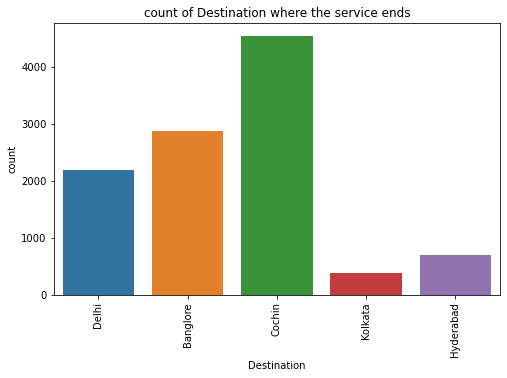

In [352]:
#count plot for Source
plt.figure(figsize=(8,5))
sns.countplot(df_train['Destination'])
plt.title("count of Destination where the service ends")
plt.xticks(rotation=90)
plt.show()

The most of the flights service ends in Cochin Destination

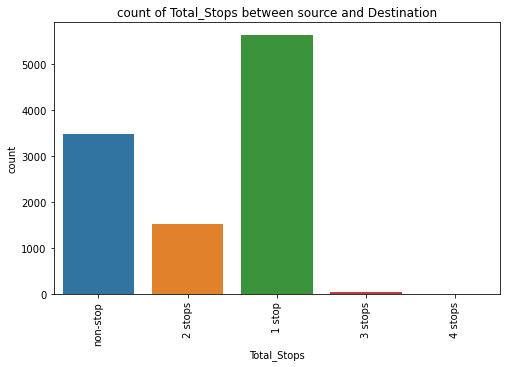

In [353]:
#count plot for Source
plt.figure(figsize=(8,5))
sns.countplot(df_train['Total_Stops'])
plt.title("count of Total_Stops between source and Destination")
plt.xticks(rotation=90)
plt.show()

count of 1 stop flights are high followed by other and no flights have 4 stops

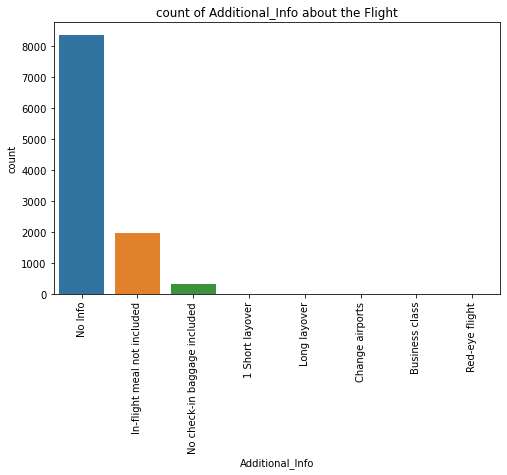

In [354]:
#count plot for Source
plt.figure(figsize=(8,5))
sns.countplot(df_train['Additional_Info'])
plt.title("count of Additional_Info about the Flight")
plt.xticks(rotation=90)
plt.show()

There is no much information about the flights we can see in this plot

# Distribution of Skewness

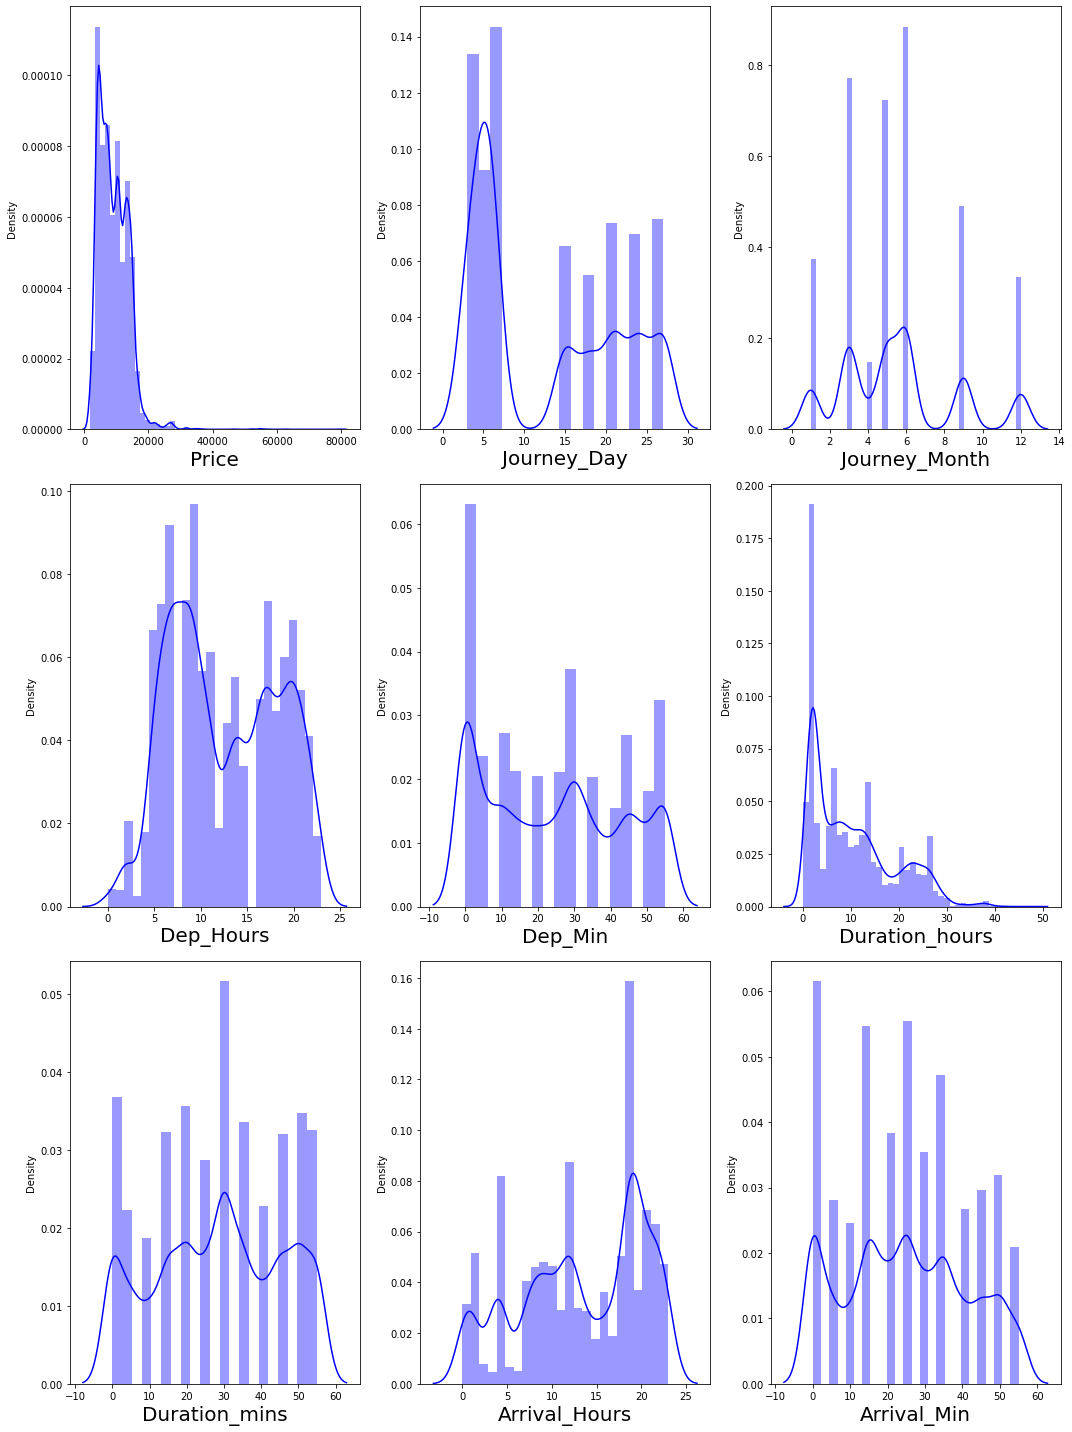

In [355]:
#Checking how data has beed distributed in each numeric column

plt.figure(figsize=(15,20), facecolor= 'white')
plotnumber=1

for column in numerical_col:
    if plotnumber <=9:
        ax= plt.subplot(3,3, plotnumber)
        sns.distplot(df_train[column], color='blue')
        plt.xlabel(column, fontsize=20)
        
        
    plotnumber +=1
plt.tight_layout()

From the distribution plot we can observe the data is not normally distributed in some columns and some columns are almost normal
but have no proper bell shape curve. 

# Bivariate Analysis

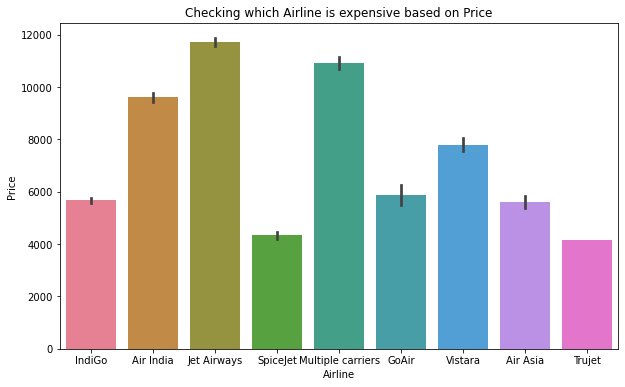

In [356]:
plt.figure(figsize=[10,6])
plt.title('Checking which Airline is expensive based on Price')
sns.barplot(df_train['Airline'], df_train['Price'],palette="husl")
plt.show()

The plot show that the jetairways is more expensive followed by others

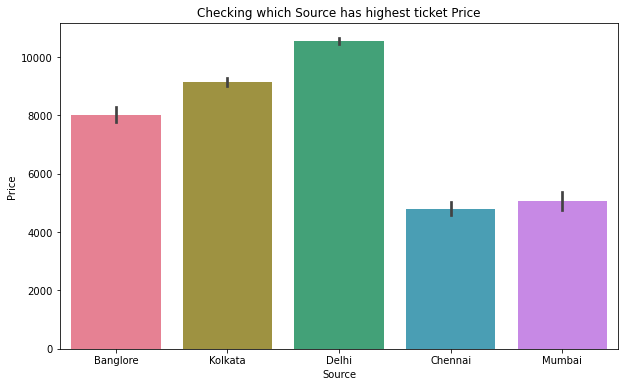

In [357]:
plt.figure(figsize=[10,6])
plt.title('Checking which Source has highest ticket Price')
sns.barplot(df_train['Source'], df_train['Price'],palette="husl")
plt.show()

The ticket prices are expensive in Delhi region followed by others

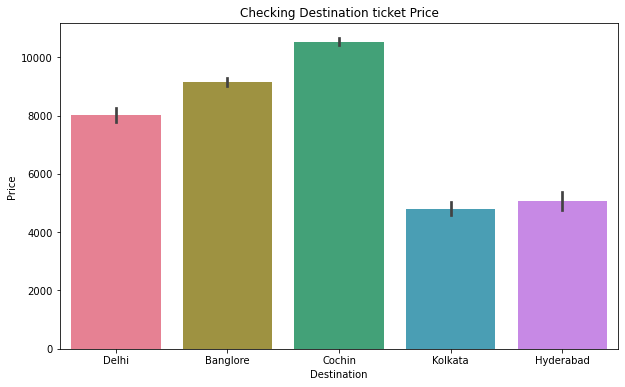

In [358]:
plt.figure(figsize=[10,6])
plt.title('Checking Destination ticket Price')
sns.barplot(df_train['Destination'], df_train['Price'],palette="husl")
plt.show()

The ticket price is high in cochin destination followed by others

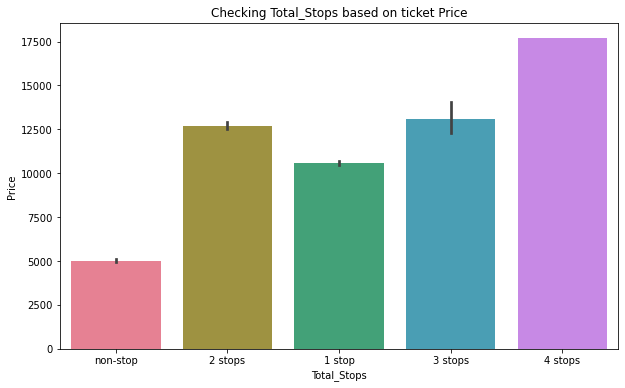

In [359]:
plt.figure(figsize=[10,6])
plt.title('Checking Total_Stops based on ticket Price')
sns.barplot(df_train['Total_Stops'], df_train['Price'],palette="husl")
plt.show()

Ticket with 4 stops  have highest price followed by other stops

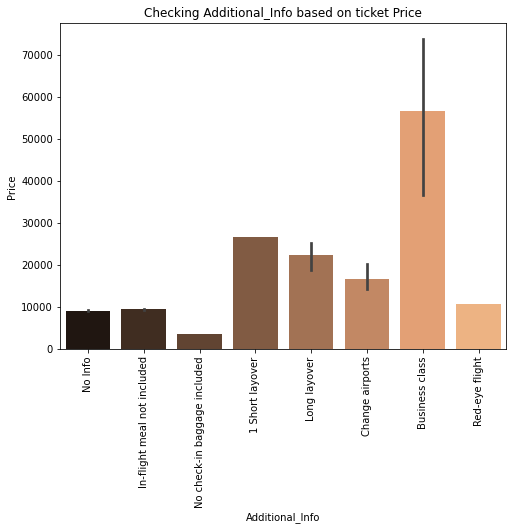

In [360]:
plt.figure(figsize=[8,6])
plt.title('Checking Additional_Info based on ticket Price')
sns.barplot(df_train['Additional_Info'], df_train['Price'],data=df_train, palette="copper")
plt.xticks(rotation=90)
plt.show()

The plt shows the Bussiness class flights are more expensive compare to others

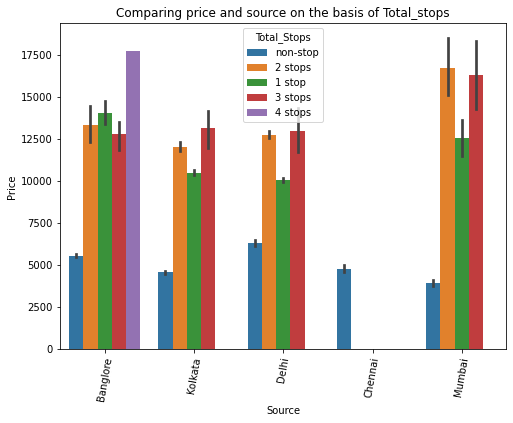

In [361]:
#checking how the price pays role in source on the basis of Total_stops
plt.figure(figsize=[8,6])
plt.title('Comparing price and source on the basis of Total_stops')
sns.barplot(x=df_train['Source'], y=df_train['Price'], hue=df_train["Total_Stops"])
plt.xticks(rotation=80)
plt.show()

We can notice that the flights in Bangalore with 1 stop is more expensive than followe by others

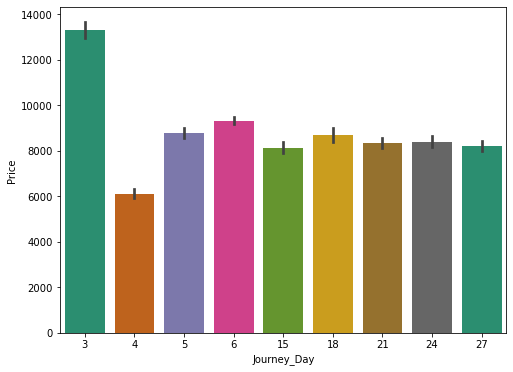

In [362]:
#checking how the price pays role in source on the basis of Total_stops
plt.figure(figsize=[8,6])
sns.barplot(df_train['Journey_Day'], df_train['Price'], data=df_train, palette="Dark2")
plt.show()

The price of the ticket is high on day 3 followed by others

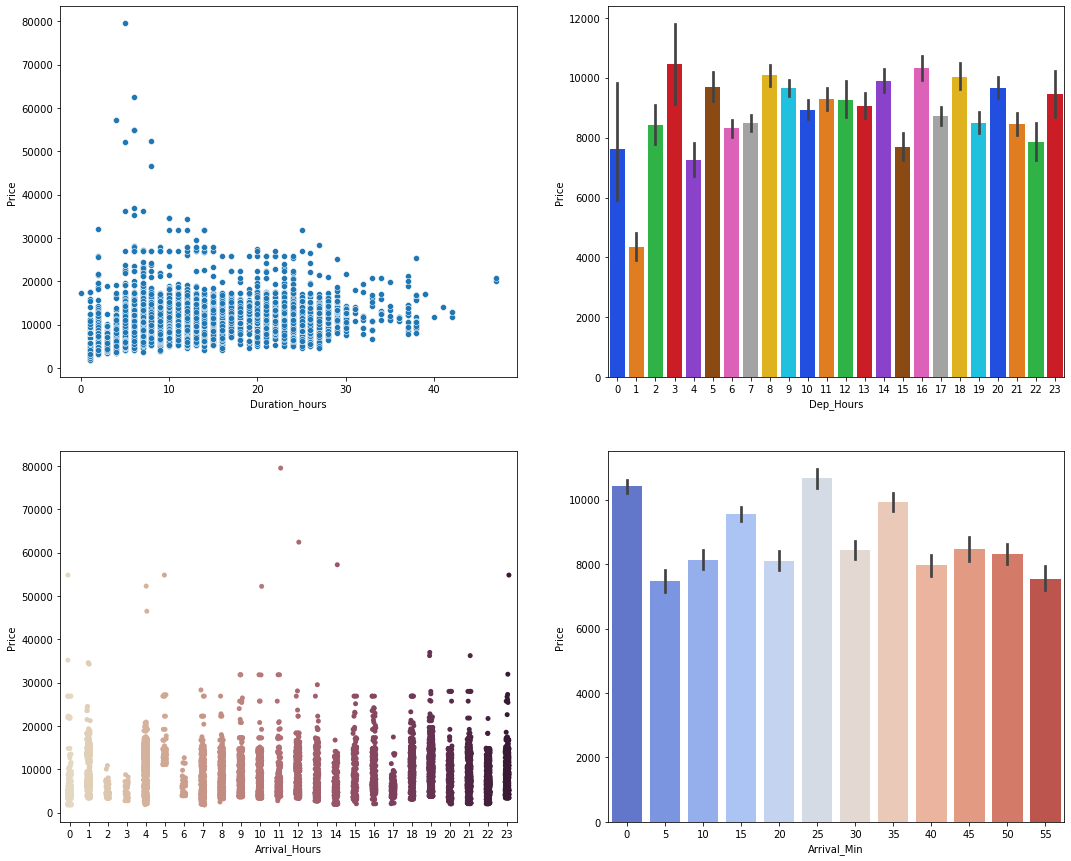

In [363]:
fig, axes=plt.subplots(2,2, figsize=(18,15))

#checking relationship betwen Duration_hours and Price
sns.scatterplot(x="Duration_hours", y="Price", ax=axes[0,0], data=df_train, palette='husl')

#checking relationship betwen Dep_Hour and Price
sns.barplot(x="Dep_Hours", y="Price", ax=axes[0,1], data=df_train, palette='bright')

#checking relationship betwen Arrival_Hour and Price
sns.stripplot(x="Arrival_Hours", y="Price", ax=axes[1,0], data=df_train, palette='ch:.28')

#checking relationship betwen Arrival_mins and Price
sns.barplot(x="Arrival_Min", y="Price", ax=axes[1,1], data=df_train, palette='coolwarm')

plt.show()

From the above plot we can observe there is no much significance difference in any of the classes with the price

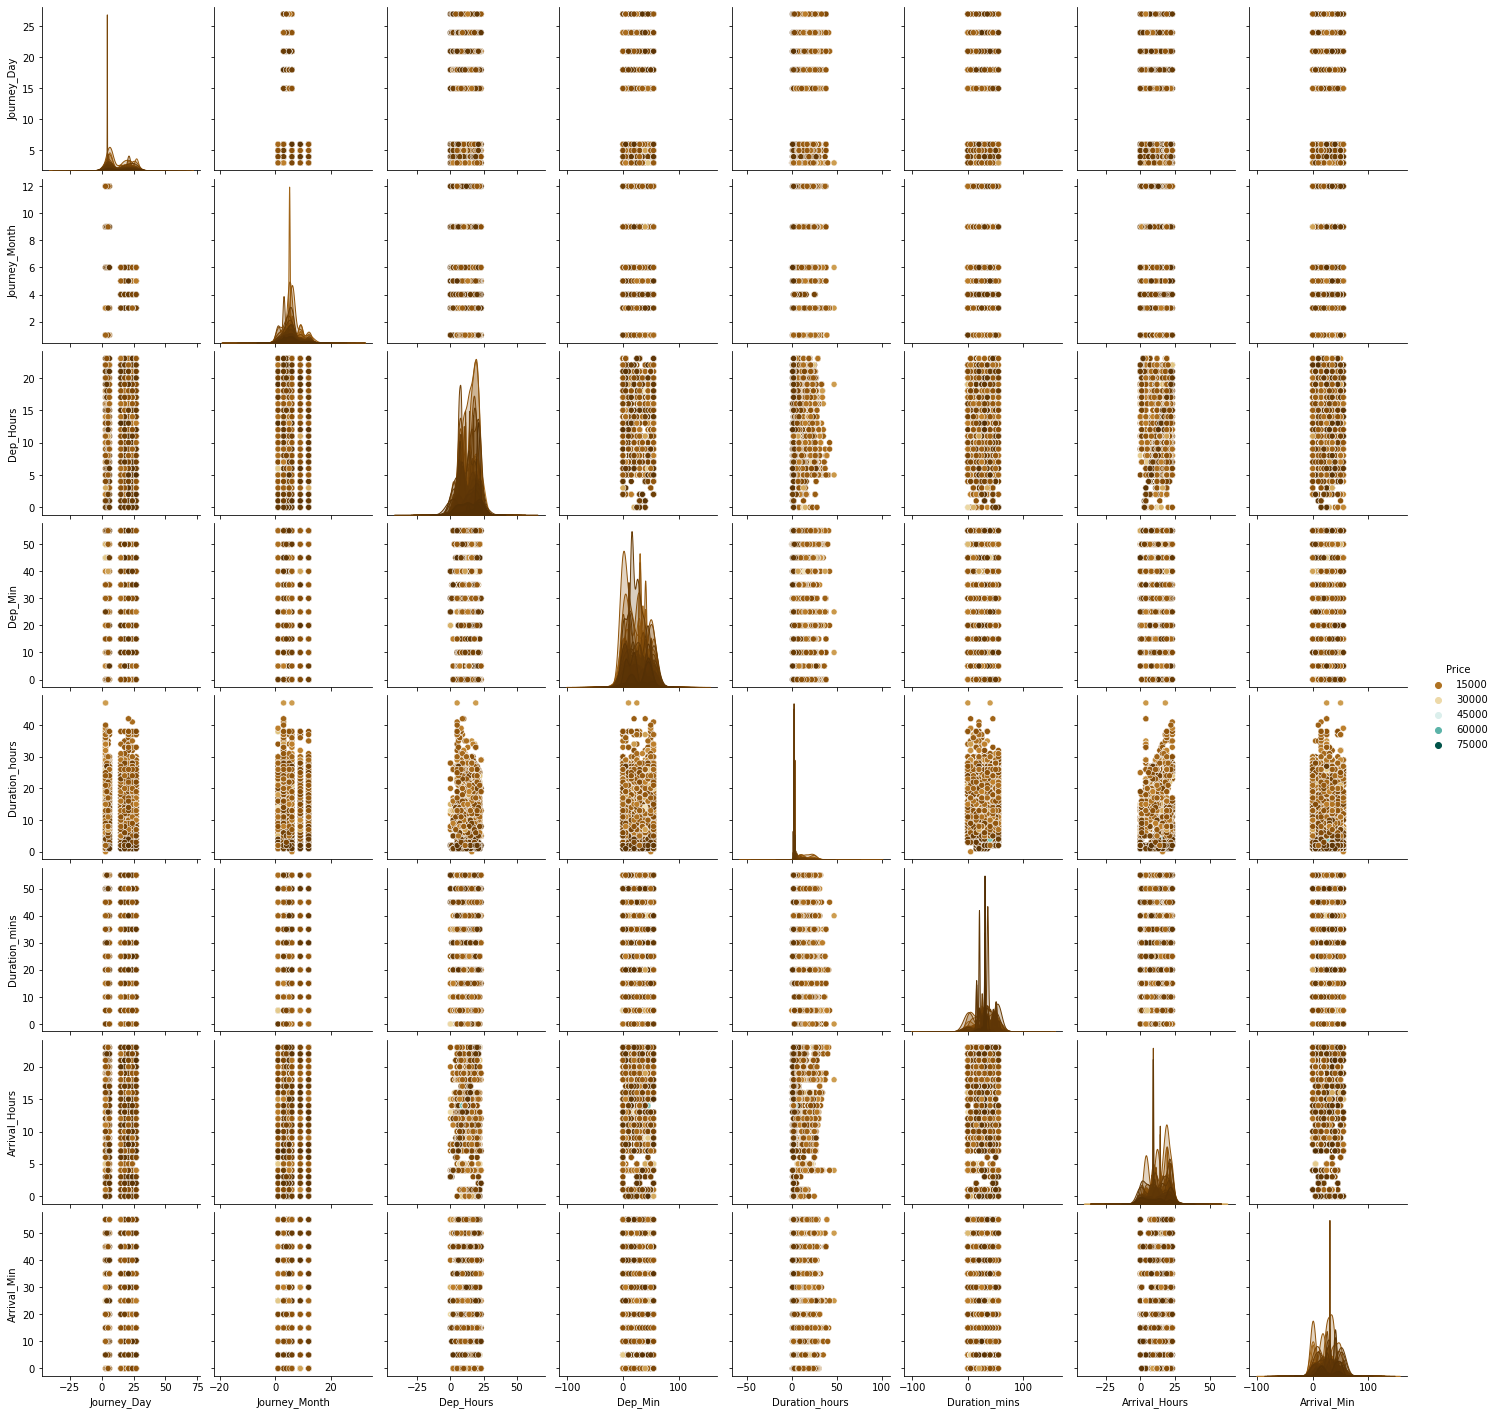

In [364]:
sns.pairplot(df_train, hue="Price", palette="BrBG")

# Checking for Outliers

<AxesSubplot:>

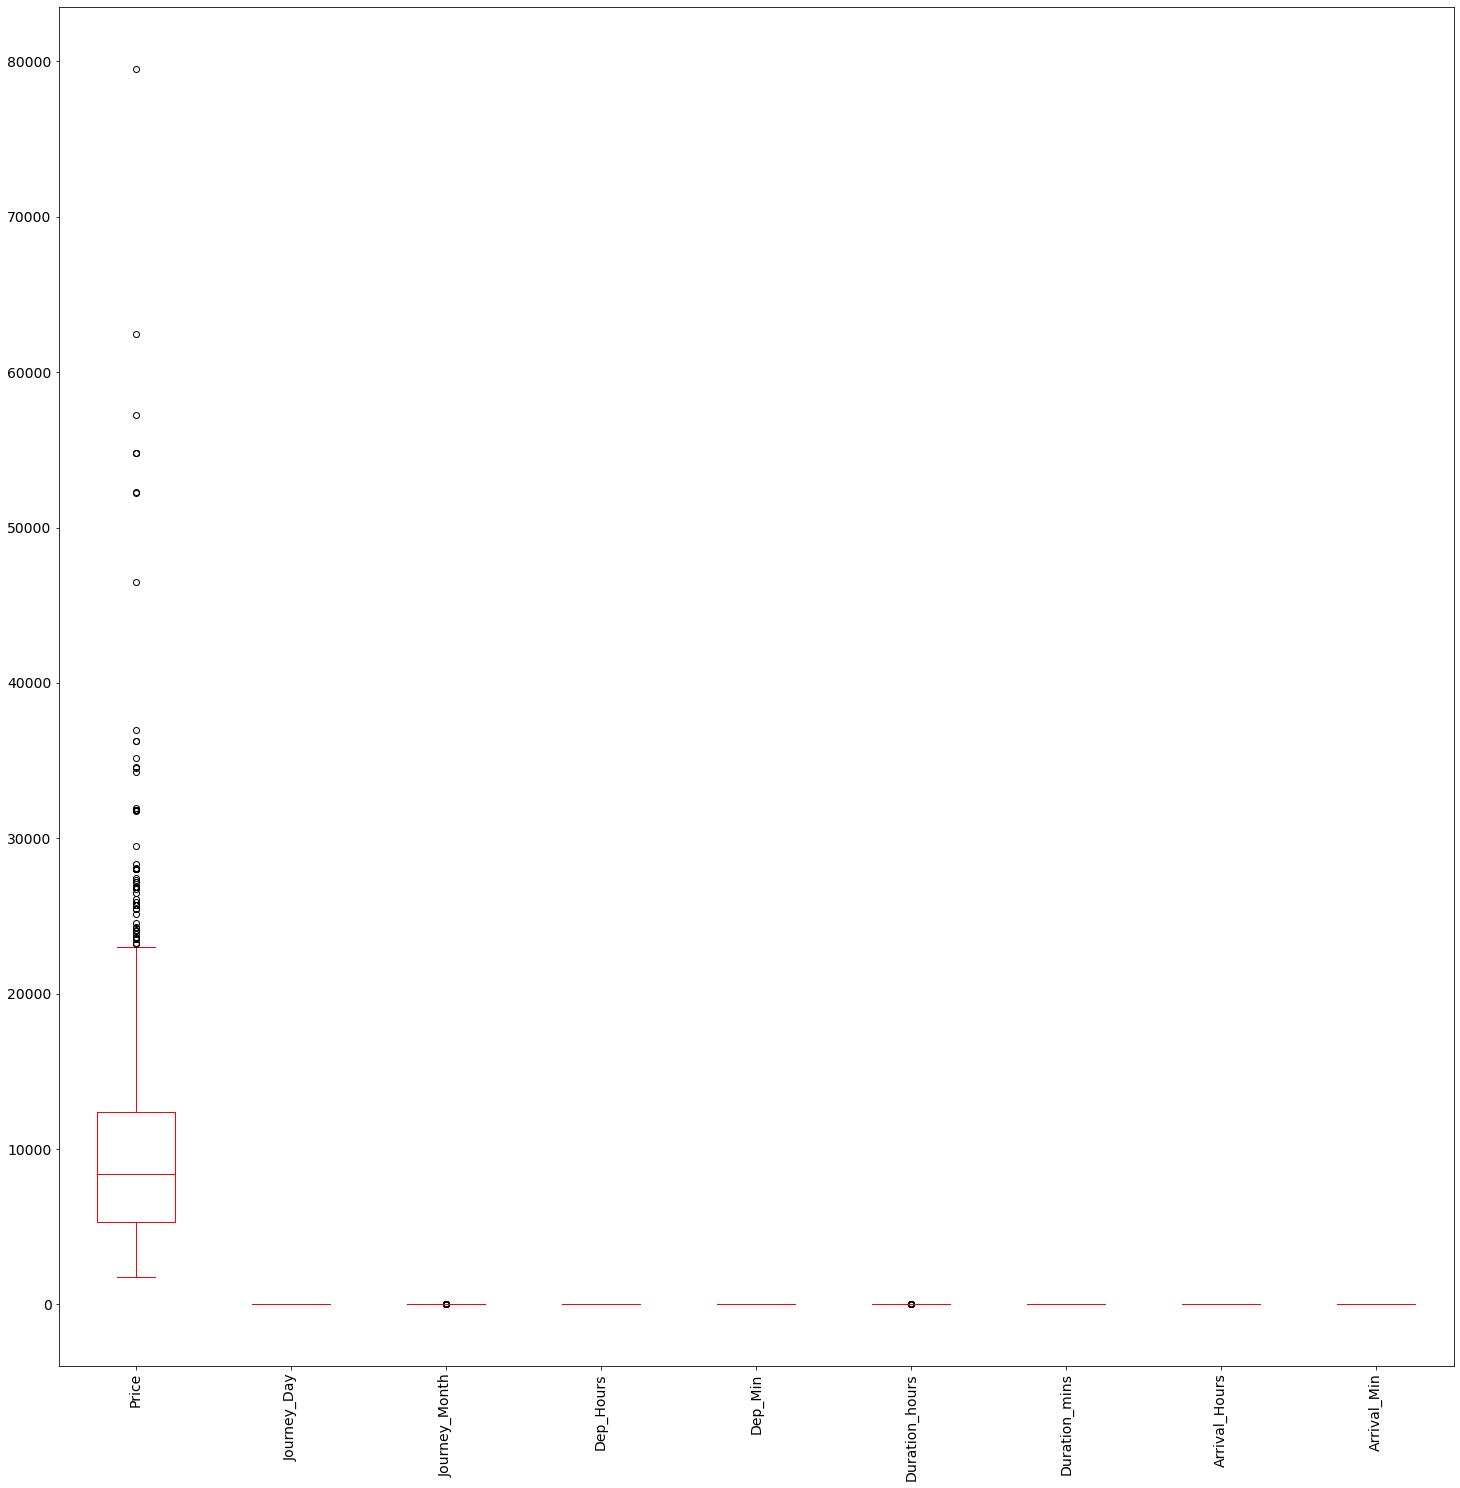

In [365]:
#checking for outliers using  boxplot

df_train.plot(rot=90, kind='box', fontsize=14, figsize=(25,25), color='r')

The outliers present in price, journey_month and duration-hours

since price is our target column so no need to remove outliers in this columns

# Removing Outliers

In [366]:
#Feature containig outliers
features=df_train[["Duration_hours", "Journey_Month"]]

from scipy.stats import zscore
z=np.abs(zscore(features))
df_train_new=df_train[(z<3).all(axis=1)]
df_train_new

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hours,Dep_Min,Duration_hours,Duration_mins,Arrival_Hours,Arrival_Min
0,IndiGo,Banglore,Delhi,BLR → DEL,non-stop,No Info,3897,24,3,22,20,2,50,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No Info,7662,5,1,5,50,7,25,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No Info,13882,6,9,9,25,19,0,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No Info,6218,5,12,18,5,5,25,23,30
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,1 stop,No Info,13302,3,1,16,50,4,45,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No Info,4107,4,9,19,55,2,30,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No Info,4145,27,4,20,45,2,35,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No Info,7229,27,4,8,20,3,0,11,20
10681,Vistara,Banglore,Delhi,BLR → DEL,non-stop,No Info,12648,3,1,11,30,2,40,14,10


In [367]:
df_train.shape

(10683, 15)

before removing outliers we had 10683 rows and 15 columns

In [368]:
df_train_new.shape

(10617, 15)

after removing outliers we had 10617 rows and 15 columns

In [369]:
#checking the dataloss

data_loss=(10683-10617)/10683*100
data_loss

0.6178039876439202

Here we have 6% data loss which is less than 10 

# Cheking the Skewness

In [370]:
df_train_new.skew()

Price             1.824502
Journey_Day       0.367029
Journey_Month     0.628224
Dep_Hours         0.103798
Dep_Min           0.164551
Duration_hours    0.761022
Duration_mins    -0.097354
Arrival_Hours    -0.361250
Arrival_Min       0.107805
dtype: float64

In [371]:
df_train_new["Duration_hours"]=np.log1p(df_train_new["Duration_hours"])
df_train_new["Journey_Month"]=np.log1p(df_train_new["Journey_Month"])

In [372]:
#Again checking the skewness
df_train_new.skew()

Price             1.824502
Journey_Day       0.367029
Journey_Month    -0.533689
Dep_Hours         0.103798
Dep_Min           0.164551
Duration_hours   -0.109197
Duration_mins    -0.097354
Arrival_Hours    -0.361250
Arrival_Min       0.107805
dtype: float64

We can observed that the skewness has been removed in Duration_hours and Journey_Month

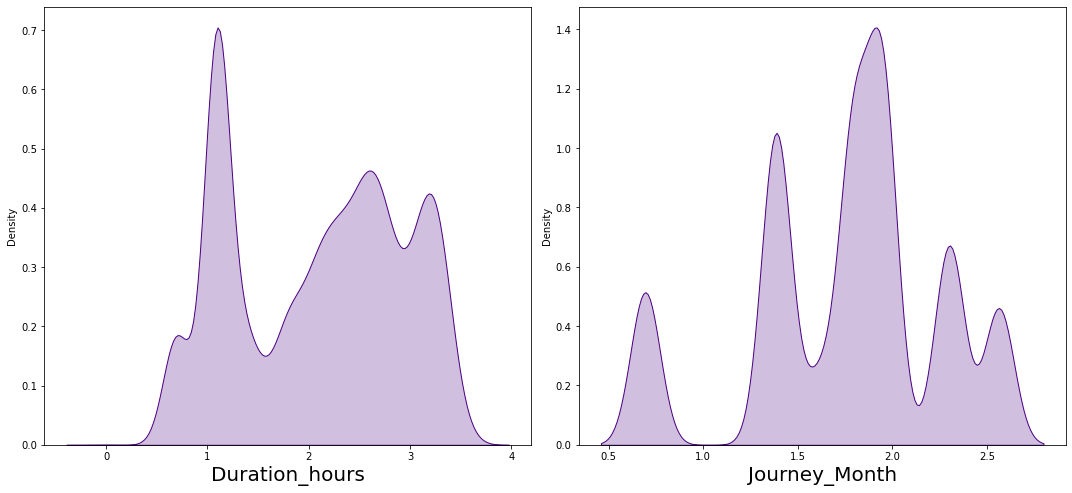

In [373]:
#checking how the data has been distributed after removing the skewness

skew=["Duration_hours", "Journey_Month"]
                  
plt.figure(figsize=(15,20), facecolor= 'white')
plotnumber=1

for column in df_train_new[skew]:
    if plotnumber <=2:
        ax= plt.subplot(3,2, plotnumber)
        sns.distplot(df_train_new[column], color='indigo', kde_kws={"shade": True}, hist=False)
        plt.xlabel(column, fontsize=20)
        
        
    plotnumber +=1
plt.tight_layout()

The data looks almost normal and skewness is also removed

# Encoding the Categorical columns using Label Encoding

In [374]:
categorical_col=[]
for i in df_train.dtypes.index:
    if df_train.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']


These are the categorical columns

In [375]:
categorical_col =['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df_train_new[categorical_col] = df_train_new[categorical_col].apply(LE.fit_transform)

df_train_new

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hours,Dep_Min,Duration_hours,Duration_mins,Arrival_Hours,Arrival_Min
0,3,0,2,18,4,5,3897,24,1.386294,22,20,1.098612,50,1,10
1,1,3,0,84,1,5,7662,5,0.693147,5,50,2.079442,25,13,15
2,4,2,1,118,1,5,13882,6,2.302585,9,25,2.995732,0,4,25
3,3,3,0,91,0,5,6218,5,2.564949,18,5,1.791759,25,23,30
4,3,0,2,29,0,5,13302,3,0.693147,16,50,1.609438,45,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,64,4,5,4107,4,2.302585,19,55,1.098612,30,22,25
10679,1,3,0,64,4,5,4145,27,1.609438,20,45,1.098612,35,23,20
10680,4,0,2,18,4,5,7229,27,1.609438,8,20,1.386294,0,11,20
10681,8,0,2,18,4,5,12648,3,0.693147,11,30,1.098612,40,14,10


Now we have converted the categorical columns into numeric columns using Label Encoding methoda

# Correlation between the target variables  and independent variables using Heat Map

In [376]:
corr=df_train_new.corr()
corr

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hours,Dep_Min,Duration_hours,Duration_mins,Arrival_Hours,Arrival_Min
Airline,1.000000,-0.013641,0.055391,0.021921,-0.010497,-0.056234,0.024773,0.025366,0.005402,-0.028238,-0.070340,-0.076407,-0.043858,-0.005868,-0.087465
Source,-0.013641,1.000000,-0.434677,0.404009,-0.225922,-0.034128,0.016718,0.007158,0.062011,0.059469,-0.055929,0.149110,-0.145872,0.026144,0.021640
Destination,0.055391,-0.434677,1.000000,-0.230755,0.510659,0.115602,-0.263334,0.007309,-0.061873,-0.088810,0.097052,-0.493825,0.021895,-0.058190,0.006954
Route,0.021921,0.404009,-0.230755,1.000000,-0.439372,0.002232,0.163635,0.096042,0.076196,-0.070005,-0.066420,0.383743,-0.229643,0.011514,-0.174071
Total_Stops,-0.010497,-0.225922,0.510659,-0.439372,1.000000,0.234493,-0.572413,0.043711,-0.048791,0.038512,0.049105,-0.806706,0.182696,-0.095213,0.176915
Additional_Info,-0.056234,-0.034128,0.115602,0.002232,0.234493,1.000000,-0.114590,-0.012301,-0.025319,-0.052282,0.008984,-0.255705,0.059669,-0.005902,0.044179
Price,0.024773,0.016718,-0.263334,0.163635,-0.572413,-0.114590,1.000000,-0.163765,-0.013511,0.011430,-0.025585,0.605075,-0.122893,0.021107,-0.088909
Journey_Day,0.025366,0.007158,0.007309,0.096042,0.043711,-0.012301,-0.163765,1.000000,-0.097582,-0.002628,-0.017421,-0.041874,-0.008671,-0.001501,-0.021901
Journey_Month,0.005402,0.062011,-0.061873,0.076196,-0.048791,-0.025319,-0.013511,-0.097582,1.000000,0.020587,-0.005264,0.062242,-0.023684,-0.005743,-0.031453
Dep_Hours,-0.028238,0.059469,-0.088810,-0.070005,0.038512,-0.052282,0.011430,-0.002628,0.020587,1.000000,-0.026077,0.000980,-0.029934,0.010967,0.068350


This gives the correlation between the dependent and independentvariables. We can visualize the same using Heat map

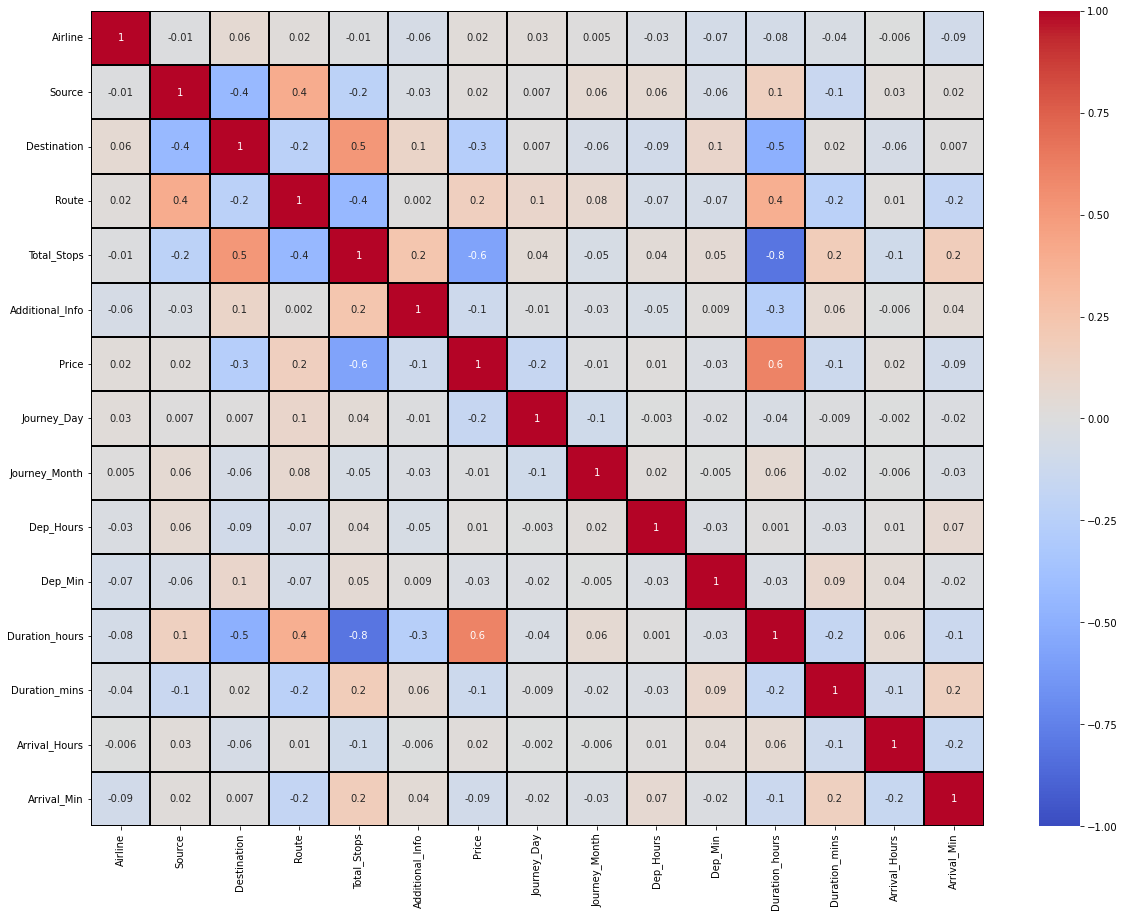

In [377]:
#Visualizing the correlation using heat map

plt.figure(figsize=(20,15))
sns.heatmap(df_train_new.corr(), linewidths=.1,vmin=-1,vmax=1,fmt='.1g',annot=True,linecolor="black", annot_kws={'size':10}, cmap="coolwarm")
plt.yticks(rotation=0);

These heatmap contains both positive and negative correlation

The feature Duration_hours is highly positive correlated with the target variable price.

The feature Total_Stops is highly negative correlated with the target variable price.

The feature Duration_hours and Destination are highly negatively correlated with each other. This may lead to multicollinearity 
problem, so we will check the VIF value to solve this, if we get features having VIF morethan 10 then we can drop those columns

In [378]:
corr['Price'].sort_values(ascending=False)

Price              1.000000
Duration_hours     0.605075
Route              0.163635
Airline            0.024773
Arrival_Hours      0.021107
Source             0.016718
Dep_Hours          0.011430
Journey_Month     -0.013511
Dep_Min           -0.025585
Arrival_Min       -0.088909
Additional_Info   -0.114590
Duration_mins     -0.122893
Journey_Day       -0.163765
Destination       -0.263334
Total_Stops       -0.572413
Name: Price, dtype: float64

# Visualizing the correlation between label and features using bar plot

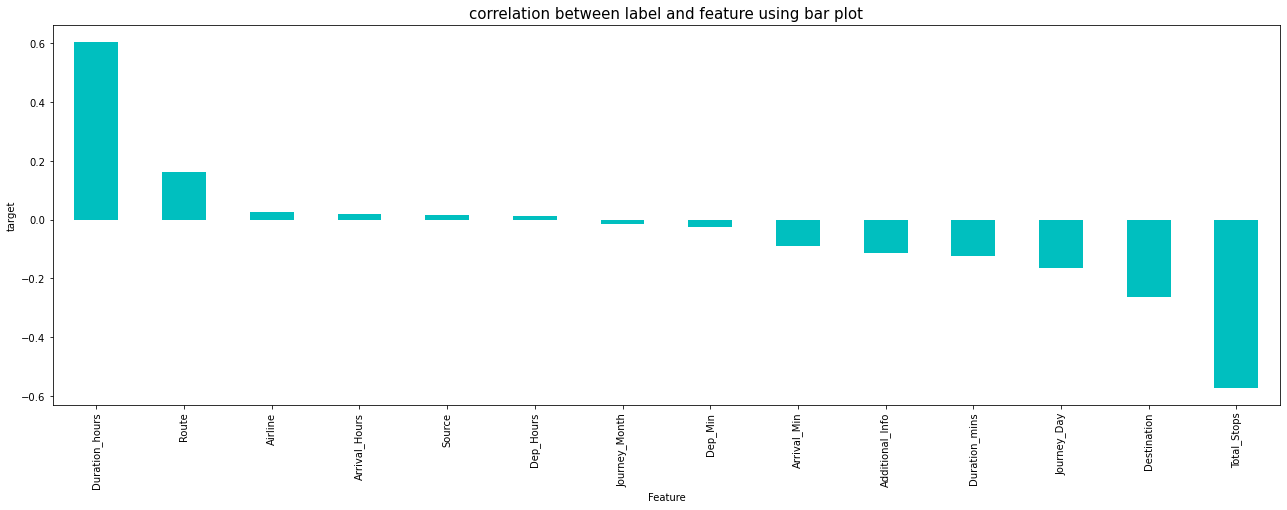

In [379]:
plt.figure(figsize=(22,7))
df_train_new.corr()['Price'].sort_values(ascending=False).drop('Price').plot(kind='bar', color='c')
plt.xlabel('Feature', fontsize=10)
plt.ylabel('target', fontsize=10)
plt.title('correlation between label and feature using bar plot', fontsize=15)
plt.show()

The features Journey_Month, source, Arrival_Hour and airline has very less correlation with the label so we can drop these column, if necessary

# Seperating the features  and label variables into x and y

In [380]:
x=df_train_new.drop("Price", axis=1)
y=df_train_new["Price"]

In [381]:
x.shape

(10617, 14)

In [382]:
y.shape

(10617,)

# Scaling the data using Standard Scaler

In [383]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x= pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Dep_Hours,Dep_Min,Duration_hours,Duration_mins,Arrival_Hours,Arrival_Min
0,-0.345488,-1.655042,0.812707,-1.544003,1.402360,0.424603,1.286176,-0.754967,1.649475,-0.235894,-1.183984,1.274299,-1.794784,-0.889208
1,-1.464134,0.888124,-1.157048,0.254498,-0.253797,0.424603,-0.873920,-2.141814,-1.312186,1.362715,-0.009867,-0.201145,-0.046050,-0.586465
2,0.213836,0.040402,-0.172170,1.180998,-0.253797,0.424603,-0.760231,1.078344,-0.615325,0.030541,1.086993,-1.676590,-1.357601,0.019019
3,-0.345488,0.888124,-1.157048,0.445248,-0.805850,0.424603,-0.873920,1.603281,0.952614,-1.035199,-0.354241,-0.201145,1.411228,0.321762
4,-0.345488,-1.655042,0.812707,-1.244253,-0.805850,0.424603,-1.101299,-2.141814,0.604183,1.362715,-0.572492,0.979210,1.119772,0.624504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10612,-2.023458,0.888124,-1.157048,-0.290502,1.402360,0.424603,-0.987609,1.078344,1.126829,1.629150,-1.183984,0.093944,1.265500,0.019019
10613,-1.464134,0.888124,-1.157048,-0.290502,1.402360,0.424603,1.627244,-0.308502,1.301044,1.096280,-1.183984,0.389033,1.411228,-0.283723
10614,0.213836,-1.655042,0.812707,-1.544003,1.402360,0.424603,1.627244,-0.308502,-0.789540,-0.235894,-0.839609,-1.676590,-0.337506,-0.283723
10615,2.451129,-1.655042,0.812707,-1.544003,1.402360,0.424603,-1.101299,-2.141814,-0.266894,0.296976,-1.183984,0.684121,0.099677,-0.889208


We have scaled the data using standard scalar methodto overcome with the issue of data biasness.

In the heat map we have found some features having high correlation between each other which means multicolinearity problem.

Lets check VIF value to solve multicolineariy issue

# VIF

In [384]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif values"]=[variance_inflation_factor(x.values, i) 
              for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,vif values,Features
0,1.044046,Airline
1,1.511995,Source
2,1.762240,Destination
3,1.583264,Route
4,3.330957,Total_Stops
5,1.107199,Additional_Info
6,1.035552,Journey_Day
7,1.022110,Journey_Month
8,1.035078,Dep_Hours
9,1.030532,Dep_Min


Here we can see that VIF values are less than 10 in all columns. WE are free from Multicolinearity problem. Now lets move to build a Machine learning Model

# Finding best Random State and Accuracy:

In [385]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report,r2_score,roc_curve, confusion_matrix
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.model_selection import train_test_split, cross_validate,GridSearchCV, KFold, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC


In [386]:
maxAccu=0
maxRS=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.30, random_state=i)
    mod = RandomForestRegressor()
    mod.fit(x_train, y_train)
    pred=mod.predict(x_test)
    acc=r2_score(y_test, pred)
    
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print("Maximum r2 score is", maxAccu, "on Random_state", maxRs)

Maximum r2 score is 0.9171283236547261 on Random_state 181


# Creating Train test Split

In [387]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.30, random_state=181)

In [202]:
#!pip install xgboost

# Random Forest Regressor

In [388]:
#checking accuracy for RandomForestRegressor
from sklearn import metrics

RFR=RandomForestRegressor()
RFR.fit(x_train, y_train)

predRFR= RFR.predict(x_test)
print('R2_score:', r2_score(y_test, predRFR))

print('MAE:',metrics.mean_absolute_error(y_test, predRFR))
print('MSE:', metrics.mean_squared_error(y_test, predRFR))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, predRFR)))

R2_score: 0.9196189515411934
MAE: 648.4782193413147
MSE: 1629644.221418862
RMSE: 1276.5751922307052


# Decision Tree Regressor

In [389]:
#checking accuracy for decision tree classifier
from sklearn.tree import DecisionTreeRegressor
DTR=DecisionTreeRegressor()
DTR.fit(x_train, y_train)

predDTR= DTR.predict(x_test)
print('R2_score:', r2_score(y_test, predDTR))

print('MAE:',metrics.mean_absolute_error(y_test, predDTR))
print('MSE:', metrics.mean_squared_error(y_test, predDTR))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, predDTR)))

R2_score: 0.865278218328801
MAE: 699.5571249215317
MSE: 2731347.4657180724
RMSE: 1652.6788755587313


# GradientBoosting Regressor

In [390]:
GB=GradientBoostingRegressor()
GB.fit(x_train, y_train)

predGB= GB.predict(x_test)
print('R2_score:', r2_score(y_test, predGB))

print('MAE:',metrics.mean_absolute_error(y_test, predGB))
print('MSE:', metrics.mean_squared_error(y_test, predGB))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, predGB)))

R2_score: 0.8354790972178711
MAE: 1233.9016990350497
MSE: 3335494.4189227778
RMSE: 1826.3336001187674


# BaggingRegressor

In [391]:
from sklearn.ensemble import BaggingRegressor
BR=BaggingRegressor()
BR.fit(x_train, y_train)

predBR= BR.predict(x_test)
print('R2_score:', r2_score(y_test, predBR))

print('MAE:',metrics.mean_absolute_error(y_test, predBR))
print('MSE:', metrics.mean_squared_error(y_test, predBR))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, predBR)))

R2_score: 0.9087139352284686
MAE: 683.172301736765
MSE: 1850732.36544348
RMSE: 1360.4162471256657


# XGB Regressor

In [392]:
from xgboost import XGBRegressor as xgb

XGB=xgb(verbosity=0)
XGB.fit(x_train, y_train)

predXGB= XGB.predict(x_test)
print('R2_score:', r2_score(y_test, predXGB))

print('MAE:',metrics.mean_absolute_error(y_test, predXGB))
print('MSE:', metrics.mean_squared_error(y_test, predXGB))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, predXGB)))

R2_score: 0.9149428776691801
MAE: 755.9484088560058
MSE: 1724446.8759072449
RMSE: 1313.1819660303156


# Checking the Cross Validation Score


In [393]:
from sklearn.model_selection import cross_val_score

In [394]:
# checking cv score for RandomForest Regressor

print(cross_val_score(RFR, x,y, cv=5).mean())

0.8794646836276783


In [395]:
# checking cv score for Decision Tree Regressor
print(cross_val_score(DTR, x,y, cv=5).mean())

0.7965323211039956


In [396]:
# checking cv score for GradientBoosting Regressor
print(cross_val_score(GB, x,y, cv=5).mean())

0.808987535274626


In [397]:
# checking cv score for Bagging Regressor
print(cross_val_score(BR, x,y, cv=5).mean())

0.8720349258461813


In [398]:
# checking cv score for XGBoot Regressor
print(cross_val_score(XGB, x,y, cv=5).mean())

0.8929284039106827


From the difference between R2 score and cross validation we can conclude that XGB Regressor is our best fitmodel. We can perfor the hypertuning on the bestmodel

# Hyper Parameter Tuning


In [399]:
from sklearn.model_selection import GridSearchCV

In [400]:
#xgb regresor
parameters={'n_extimators':[50,100],
           'gamma':np.arange(0,0.1),
           'max_depth':[4,6],
           'n_jobs':[-2,-1]},

In [401]:
GCV=GridSearchCV(xgb(), parameters, cv=5)

In [402]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
       

In [403]:
GCV.best_params_

{'gamma': 0.0, 'max_depth': 6, 'n_extimators': 50, 'n_jobs': -2}

In [404]:
Final_model=xgb (gamma=0.0, max_depth=6, n_extimators=50, n_jobs=-2)
Final_model.fit(x_train, y_train)
pred =Final_model.predict(x_test)

print('R2_score:', r2_score(y_test, pred)*100)
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('MAE:',metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))


R2_score: 91.49428776691802
RMSE: 1313.1819660303156
MAE: 755.9484088560058
MSE: 1724446.8759072449


# Saving the Model

In [405]:
import joblib
joblib.dump(Final_model, "Flight_Price_Prediction.pkl")

['Flight_Price_Prediction.pkl']

# Predicting the Saved model

In [406]:
model=joblib.load("Flight_Price_Prediction.pkl")

prediction=model.predict(x_test)
prediction

array([ 3181.409,  7837.038, 13163.462, ...,  8502.718,  9283.733,
       14015.483], dtype=float32)

In [407]:
pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["Predicted", "Original"])

,0,1,2,3,4,5,6,7,8,9,...,3176,3177,3178,3179,3180,3181,3182,3183,3184,3185
Predicted,3181.408936,7837.038086,13163.461914,6988.704102,4662.441895,13795.207031,4980.912598,28688.443359,1585.629517,13150.96875,...,7664.557129,7644.301758,13394.910156,15086.213867,4050.575195,14302.55957,5740.57959,8502.717773,9283.733398,14015.483398
Original,2470.000000,8996.000000,13029.000000,6416.000000,4148.000000,13712.000000,5224.000000,36235.000000,2575.000000,13628.00000,...,7480.000000,7480.000000,13941.000000,15129.000000,3873.000000,14571.00000,6478.00000,8016.000000,8366.000000,13759.000000


The predicted and actual values are alomost the same

# Test Data

In [408]:
df_test=pd.read_excel("C:\\Users\\Acer Aspire 3\\Desktop\\Test_set.xlsx")
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


This test dataset has no target variable, we need to use past data(traindataset) to get the ticket price prediction

In [409]:
#checking the dimension of data
df_test.shape

(2671, 10)

Test data set contain 2671 rows and 10 columns

In [410]:
#checking how many columns are there in the data set

df_test.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

These are th columns present in the test dataset

In [411]:
# checking the type of dataset
df_test.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

All the columns in test dataset have object datatype

# Feature Engineering


converting data and time columns from object type to datetime type

In [412]:
df_test['Date_of_Journey']=pd.to_datetime(df_test['Date_of_Journey'])
df_test['Dep_Time']=pd.to_datetime(df_test['Dep_Time'])
df_test['Arrival_Time']=pd.to_datetime(df_test['Arrival_Time'])

In [413]:
#after converting checking the 
df_test.dtypes


Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
dtype: object

We have converted object datatype to datetime datatype

In [414]:
#Extracting day from Date_of_Journey column
df_test["Journey_Day"]=pd.to_datetime(df_test.Date_of_Journey, format="%d%m%Y").dt.day

#Extracting month from Date_of_Journey column
df_test["Journey_Month"]=pd.to_datetime(df_test.Date_of_Journey, format="%d%m%Y").dt.month


Now we have extracted hours and minute from Dep_Time column. So we can drop this column

In [415]:
df_test.drop("Date_of_Journey", axis=1, inplace=True)

In [416]:
#converting duration column into list
duration=list(df_test["Duration"])

for i in range(len(duration)):
    
    #checking if duration contain only hour or minute
    if len(duration[i].split()) != 2:
        if 'h' in duration[i]:
            duration[i]=duration[i].strip()+' 0m'
        else:
            duration[i]="0h "+duration[i]
duration_hours=[]
duration_mins=[]

for i in range(len(duration)):
    
    #extracting hours from Duration
    duration_hours.append(int(duration[i].split(sep='h')[0]))
    
    #extracting mins from duration
    duration_mins.append(int(duration[i].split(sep='m')[0].split()[-1]))

In [417]:
#adding duration hours and duration mins to the data set

df_test["Duration_hours"]= duration_hours
df_test["Duration_mins"]= duration_mins

#dropping duration column
df_test.drop("Duration", axis=1, inplace=True)

In [418]:
# Extracting values from dep_time. Departure time as hours and minutes

#Extracting hour from Dep_Time column
df_test["Dep_Hours"]=pd.to_datetime(df_test.Dep_Time, format="%d%m%Y").dt.hour

#Extracting min from Dep_Time column
df_test["Dep_Min"]=pd.to_datetime(df_test.Dep_Time, format="%d%m%Y").dt.minute


Now we have extracted hours and minute from Dep_Time column. So we can drop this column 

In [419]:
df_test.drop(("Dep_Time"), axis=1, inplace=True)

Similarly we are ectracting hours and mnutes from Arrival_Time column

In [420]:
#Extracting hour from Arrival_Time column
df_test["Arrival_Hours"]=pd.to_datetime(df_test["Arrival_Time"]).dt.hour

#Extracting min from Dep_Time column
df_test["Arrival_Min"]=pd.to_datetime(df_test["Arrival_Time"]).dt.minute

#dropping arriaal time after extracting
df_test.drop(("Arrival_Time"), axis=1, inplace=True)


Now we have extracted the values from all the columns. Let us check the dataframe after feature engineering

In [421]:
#checking the dataset again

df_test.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Duration_hours,Duration_mins,Dep_Hours,Dep_Min,Arrival_Hours,Arrival_Min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,6,10,55,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,5,12,4,0,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,21,5,23,45,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,21,5,13,0,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info,24,6,2,50,23,55,2,45


In [422]:
df_test.shape

(2671, 14)

In [423]:
#checking the value counts of each columns
for i in df_test.columns:
    print(df_test[i].value_counts())
    print('**********************************')

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64
**********************************
Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64
**********************************
Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64
**********************************
DEL → BOM → COK                624
BLR → DEL                      389
CCU → BOM → BLR                253
CCU → BLR                      172
BOM → HYD               

These are the list of values present in the columns.

From the above value counts we can observe some repeated categories in some column. lets replace them.

In [424]:
#replacing "Jet Airways Business" as "Jet Airways" in the column Airline
df_test["Airline"]=df_test["Airline"].replace("Jet Airways Business", "Jet Airways")

#replacing "Multiple carriers premium economy" as "Multiple Carrirss" in the Airline column
df_test["Airline"]=df_test["Airline"].replace("Multiple carriers Premium economy", "Multiple carriers")

#replacing "vistara premium economy" as "Vistara" in the column Airline
df_test["Airline"]=df_test["Airline"].replace("Vistara Premium economy", "Vistara")

#replacing "New Delhi" as "Delhi" in the column Destination
df_test["Destination"]=df_test["Destination"].replace("New Delhi", "Delhi")

#replacing "no info", "no info" as "are one and the same replace it by "No Info"
df_test["Additional_Info"]=df_test["Additional_Info"].replace("No info", "No Info")

#replacing "1 long layover" and "2 long layover" as "long layover" in the column Additinal Info
df_test["Additional_Info"]=df_test["Additional_Info"].replace(["1 Long layover","2 Long layover"], "Long layover")  

In [425]:
val_count =["Airline", "Destination", "Additional_Info"]

for i in val_count:
    print(df_test[i].value_counts())
    print("******************************")

Jet Airways          899
IndiGo               511
Air India            440
Multiple carriers    350
SpiceJet             208
Vistara              131
Air Asia              86
GoAir                 46
Name: Airline, dtype: int64
******************************
Cochin       1145
Banglore      710
Delhi         555
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64
******************************
No Info                         2148
In-flight meal not included      444
No check-in baggage included      76
Long layover                       1
Business class                     1
Change airports                    1
Name: Additional_Info, dtype: int64
******************************


In [426]:
#checking null values in dataset

df_test.isnull().sum()

Airline            0
Source             0
Destination        0
Route              0
Total_Stops        0
Additional_Info    0
Journey_Day        0
Journey_Month      0
Duration_hours     0
Duration_mins      0
Dep_Hours          0
Dep_Min            0
Arrival_Hours      0
Arrival_Min        0
dtype: int64

# Description of Test DataSet

In [427]:
df_test.describe()

,Journey_Day,Journey_Month,Duration_hours,Duration_mins,Dep_Hours,Dep_Min,Arrival_Hours,Arrival_Min
count,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000
mean,12.026956,5.607263,10.189068,28.397604,12.603519,24.891426,13.585174,24.558218
std,8.564408,3.042952,8.390683,16.747651,5.686673,19.086522,7.040396,16.775436
min,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,3.000000,2.000000,15.000000,8.000000,5.000000,8.000000,10.000000
50%,6.000000,5.000000,8.000000,30.000000,12.000000,25.000000,15.000000,25.000000
75%,21.000000,6.000000,15.000000,45.000000,18.000000,45.000000,19.000000,35.000000
max,27.000000,12.000000,40.000000,55.000000,23.000000,55.000000,23.000000,55.000000


This Gives the statistical information of the dataset

The count of every column is same which means there are no missing values in dataset

The mean is more than median in  the columns Price,Journey_Day, Duration_hours,Dep_Hours which means they are skewed to right

In some columns differece is more between max and 75%, hence outliers are present

The median is greaterthan mean in Dep_Min	Arrival_Hours	Arrival_Min which means that they are skewd towards left

From the description we can say that the minimum price of the flight ticket is 1759 maximum is 79512 and mean is 9087.06

We can also see that there is huge differnce in maximun and 75% which means that outliers are present in those columns

# checking for categorical columns

In [428]:
categorical_col=[]
for i in df_test.dtypes.index:
    if df_test.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']


These are the categorical columns present in the dataset


# Simlarly checking for numeric columns

In [429]:
numerical_col=[]
for i in df_test.dtypes.index:
    if df_test.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['Journey_Day', 'Journey_Month', 'Duration_hours', 'Duration_mins', 'Dep_Hours', 'Dep_Min', 'Arrival_Hours', 'Arrival_Min']


# Checking for Outliers

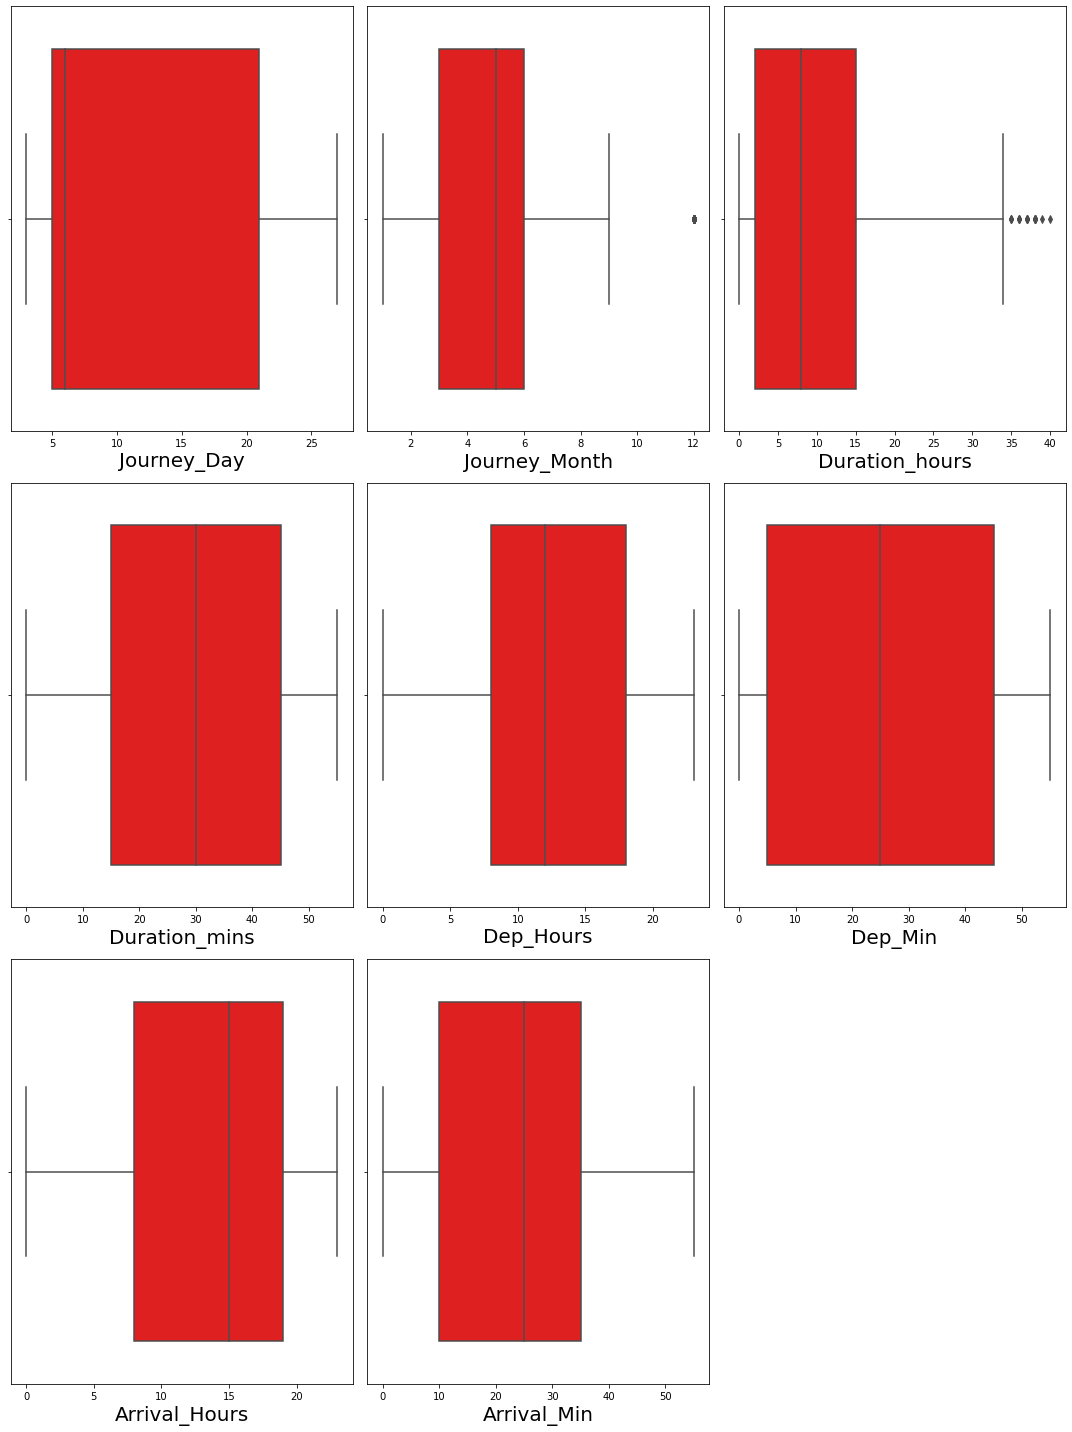

In [430]:
plt.figure(figsize=(15,20), facecolor= 'white')
plotnumber=1

for column in numerical_col:
    if plotnumber <=9:
        ax= plt.subplot(3,3, plotnumber)
        sns.boxplot(df_test[column], color='red')
        plt.xlabel(column, fontsize=20)
        
        
    plotnumber +=1
plt.tight_layout()

The outliers present in price, journey_month and duration-hours so need to remove outliers in this columns

# Removing Outliers

In [431]:
#Feature containig outliers
features=df_test[["Duration_hours", "Journey_Month"]]

from scipy.stats import zscore
z=np.abs(zscore(features))
df_test_new=df_test[(z<3).all(axis=1)]
df_test_new

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Duration_hours,Duration_mins,Dep_Hours,Dep_Min,Arrival_Hours,Arrival_Min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No Info,6,6,10,55,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No Info,5,12,4,0,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,21,5,23,45,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No Info,21,5,13,0,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No Info,24,6,2,50,23,55,2,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,1 stop,No Info,6,6,23,55,20,30,20,25
2667,IndiGo,Kolkata,Banglore,CCU → BLR,non-stop,No Info,27,3,2,35,14,20,16,55
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No Info,3,6,6,35,21,50,4,25
2669,Air India,Delhi,Cochin,DEL → BOM → COK,1 stop,No Info,3,6,15,15,4,0,19,15


In [432]:
#shape of orginal dataset
df_test.shape

(2671, 14)

In [433]:
df_test_new.shape

(2653, 14)

In [434]:
#checking the dataloss

data_loss=(2671-2653)/2671*100
data_loss

0.6739049045301385

# Checking the SKewness

In [435]:
df_test_new.skew()

Journey_Day       0.475210
Journey_Month     0.591565
Duration_hours    0.795392
Duration_mins    -0.110629
Dep_Hours         0.083357
Dep_Min           0.132681
Arrival_Hours    -0.432551
Arrival_Min       0.110111
dtype: float64

The column Jounrney month and duration hours contain skewness and they are continuoes data so we will try to remove skewness using log transformer methd

In [436]:
df_test_new["Duration_hours"]=np.log1p(df_test_new["Duration_hours"])
df_test_new["Journey_Month"]=np.log1p(df_test_new["Journey_Month"])

In [437]:
#again checking skewness
df_test_new.skew()

Journey_Day       0.475210
Journey_Month    -0.541053
Duration_hours   -0.134743
Duration_mins    -0.110629
Dep_Hours         0.083357
Dep_Min           0.132681
Arrival_Hours    -0.432551
Arrival_Min       0.110111
dtype: float64

The skewness has been removed

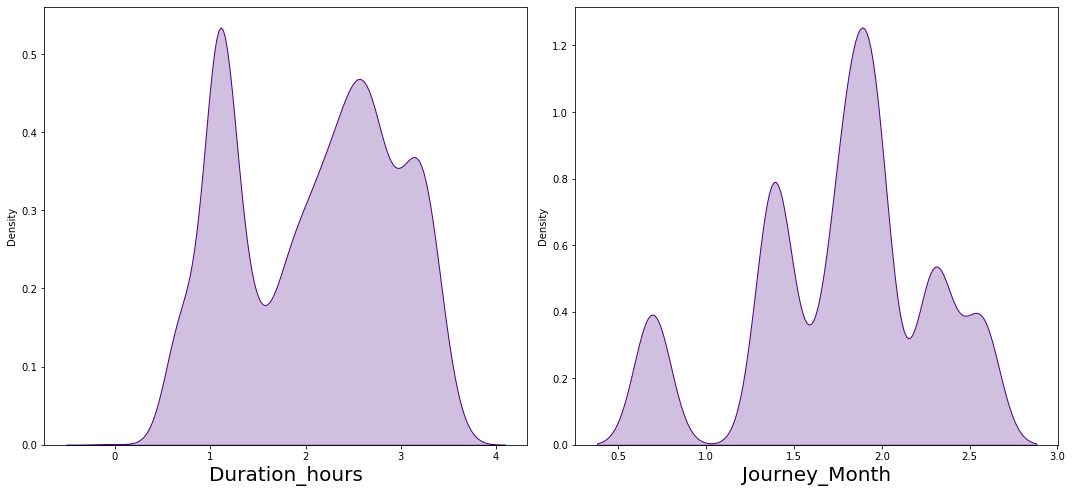

In [438]:
# checking how the data has been distributed after removing the skewness

skew=["Duration_hours", "Journey_Month"]
                  
plt.figure(figsize=(15,20), facecolor= 'white')
plotnumber=1

for column in df_test_new[skew]:
    if plotnumber <=2:
        ax= plt.subplot(3,2, plotnumber)
        sns.distplot(df_test_new[column], color='indigo', kde_kws={"shade": True}, hist=False)
        plt.xlabel(column, fontsize=20)
        
        
    plotnumber +=1
plt.tight_layout()

# Encoding the Categorical columns using Label Encoding

In [439]:
categorical_col=[]
for i in df_test.dtypes.index:
    if df_test.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']


In [440]:
categorical_col=['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [441]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df_test_new[categorical_col] = df_test_new[categorical_col].apply(LE.fit_transform)
df_test_new

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Duration_hours,Duration_mins,Dep_Hours,Dep_Min,Arrival_Hours,Arrival_Min
0,4,2,1,76,0,4,6,1.945910,2.397895,55,17,30,4,25
1,3,3,0,65,0,4,5,2.564949,1.609438,0,6,20,10,20
2,4,2,1,76,0,2,21,1.791759,3.178054,45,19,15,19,0
3,5,2,1,76,0,4,21,1.791759,2.639057,0,8,0,21,0
4,0,0,2,16,4,4,24,1.945910,1.098612,50,23,55,2,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,3,0,51,0,4,6,1.945910,3.178054,55,20,30,20,25
2667,3,3,0,43,4,4,27,1.386294,1.098612,35,14,20,16,55
2668,4,2,1,76,0,4,3,1.945910,1.945910,35,21,50,4,25
2669,1,2,1,76,0,4,3,1.945910,2.772589,15,4,0,19,15


Now we have converted the categorical columns into numeric columns using Label Encoding methoda

# Scaling the data using Standard Scaler

In [442]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
df_test_new= pd.DataFrame(scaler.fit_transform(df_test_new), columns=df_test_new.columns)
df_test_new

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Duration_hours,Duration_mins,Dep_Hours,Dep_Min,Arrival_Hours,Arrival_Min
0,0.233214,0.031440,-0.167242,0.804966,-0.791072,0.393727,-0.706193,0.344970,0.374141,1.583185,0.766320,0.272445,-1.354818,0.025591
1,-0.348833,0.873978,-1.175634,0.398570,-0.791072,0.393727,-0.823069,1.565339,-0.579376,-1.697747,-1.172433,-0.252462,-0.503215,-0.272182
2,0.233214,0.031440,-0.167242,0.804966,-0.791072,-2.166466,1.046954,0.041078,1.317622,0.986652,1.118821,-0.514916,0.774190,-1.463273
3,0.815260,0.031440,-0.167242,0.804966,-0.791072,0.393727,1.046954,0.041078,0.665790,-1.697747,-0.819933,-1.302277,1.058057,-1.463273
4,-2.094973,-1.653635,0.841150,-1.411740,1.429790,0.393727,1.397583,0.344970,-1.197140,1.284918,1.823822,1.584714,-1.638686,1.216682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2648,-1.512927,0.873978,-1.175634,-0.118662,-0.791072,0.393727,-0.706193,0.344970,1.317622,1.583185,1.295071,0.272445,0.916123,0.025591
2649,-0.348833,0.873978,-1.175634,-0.414222,1.429790,0.393727,1.748212,-0.758252,-1.197140,0.390119,0.237569,-0.252462,0.348388,1.812227
2650,0.233214,0.031440,-0.167242,0.804966,-0.791072,0.393727,-1.056822,0.344970,-0.172465,0.390119,1.471321,1.322260,-1.354818,0.025591
2651,-1.512927,0.031440,-0.167242,0.804966,-0.791072,0.393727,-1.056822,0.344970,0.827275,-0.802948,-1.524934,-1.302277,0.774190,-0.569955


We have scaled the data using standard scalarization method to overcome with the issue of data biasness

We have already loaded the saved model after saving the final model. Now lets predict the flight price using test data

# Prediction Results

In [443]:
#predicting the flight price from the feature of the testing data

Predicted_Price = model.predict(df_test_new)
Predicted_Price

array([14226.862 ,  4086.9924, 12206.301 , ..., 16192.974 ,  9537.533 ,
        6149.025 ], dtype=float32)

Here we are using our predicted final model whihc is saved as model to predict the price of the test dataset that was provided
 and containing only the features

# Creating the DataFrame and Saving the Predictions

In [444]:
Prediction =pd.DataFrame()
Prediction['Price']=Predicted_Price
Prediction

,Price
0,14226.862305
1,4086.992432
2,12206.300781
3,8488.852539
4,10214.364258
...,...
2648,8616.573242
2649,10059.079102
2650,16192.973633
2651,9537.533203


Here we are adding the predicted price output to the original dataset to complete it with the features and the target columns

In [445]:
#Saving the prediction
Prediction.to_csv("Predicted_Flight_Price_Data.csv", index=False)

I have saved the predicted value to csv file

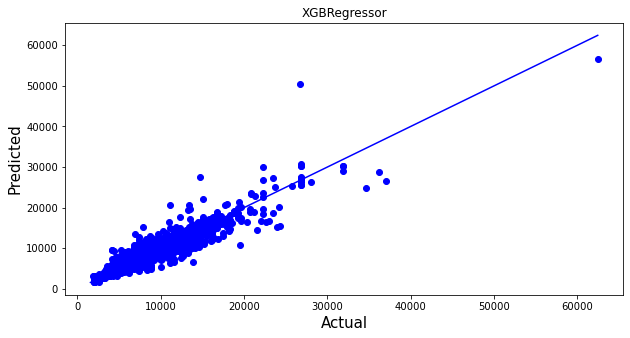

In [446]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, prediction, c='b')
p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), max(y_test))
plt.plot([p1,p2],[p1,p2], 'b-')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted',fontsize=15)
plt.title("XGBRegressor")
plt.show()
